# Лабораторная работа 1
Pandas

Выполнила: Кривоконева Екатерина, группа 6133

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1 Считывание в pandas DataFrame любой источник данных:  CSV, JSON, Excel-файл, HTML-таблицу, встроенный датасет sklearn



In [ ]:
apps = pd.read_csv('data/googleplaystore.csv')
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### Описание данных

`googleplaystore.csv` содержит подробную информацию о приложениях в Google Play. 

Числовые признаки:

- Rating - Общий пользовательский рейтинг приложения 
- Reviews - Количество отзывов пользователей о приложении 

Категориальные признаки:

- App - Название приложения
- Category - Категория, к которой относится приложение
- Size - Размер приложения 
- Installs - Количество загрузок/установок приложения пользователями 
- Type - Платный или бесплатный
- Price - Стоимость приложения 
- Content - Возрастная группа, на которую ориентировано приложение
- Genres - Жанр приложения (помимо основной категории)

Ссылка на датасет: https://www.kaggle.com/lava18/google-play-store-apps



### Предобработка данных

In [ ]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Можно заметить, что аттрибут Reviews, который должен относится к числовым признакам, имеет тип object. Проверим, что все значения в этой колонке являются числами.

In [ ]:
idx_list = []

for i in range(apps.shape[0]):
  if not apps.iloc[i, apps.columns.get_loc('Reviews')].isdigit():
    idx_list.append(i)

apps.iloc[idx_list]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Эта строка как-то странно выглядит. Далее удалим ее из датафрейма.

In [ ]:
apps = apps.drop(apps.index[idx_list])
apps.Reviews = apps.Reviews.astype('int')

apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


## 2 Выполнение операций с датафреймом

### 2.1 вывод таблицы

In [ ]:
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### 2.2 вывод первых n элементов таблицы

In [ ]:
apps.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### 2.3 вывод последних n элементов таблицы

In [ ]:
apps.tail(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


### 2.4 .describe()

In [ ]:
# статистические характеристики для числовых столбцов
apps.describe()

,Rating,Reviews
count,9366.000000,1.084000e+04
mean,4.191757,4.441529e+05
std,0.515219,2.927761e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.477550e+04
max,5.000000,7.815831e+07


### 2.5 считывание значения конкретной ячейки (с конкретным индексом из конкретной колонки) всеми известными вам способами

In [ ]:
apps.loc[3, ['Category']]

Category    ART_AND_DESIGN
Name: 3, dtype: object

In [ ]:
apps.iloc[3, apps.columns.get_loc('Category')]

'ART_AND_DESIGN'

In [ ]:
apps.at[3, 'Category']

'ART_AND_DESIGN'

In [ ]:
apps['Category'].iloc[3]

'ART_AND_DESIGN'

### 2.6 фильтрация строк по диапазону индекса

In [ ]:
apps.iloc[1:8, 5:7]

,Installs,Type
1,"500,000+",Free
2,"5,000,000+",Free
3,"50,000,000+",Free
4,"100,000+",Free
5,"50,000+",Free
6,"50,000+",Free
7,"1,000,000+",Free


### 2.7 фильтрация набора данных по какому-либо условию

In [ ]:
apps.loc[apps.Type != 'Free']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,$3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,NaN,17,157k,100+,Paid,$0.99,Mature 17+,Entertainment,"November 25, 2015",1.2,2.1 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4M,"1,000+",Paid,$7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up
10782,Trine 2: Complete Story,GAME,3.8,252,11M,"10,000+",Paid,$16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up
10785,"sugar, sugar",FAMILY,4.2,1405,9.5M,"10,000+",Paid,$1.20,Everyone,Puzzle,"June 5, 2018",2.7,2.3 and up


### 2.8. работа с пропущенными значениями (если они есть): удаление строк с пропущенными значениями, заполнение пропущенных значений средним значением по колонке. Если пропущенных значений нет — намеренно их "генерируете", прибивая какие-то куски данных в np.nan

In [ ]:
# проверяем есть ли пропущенные  значения
apps.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [ ]:
# заменим Nan в столбце Rating средним значением по этому признаку
apps.Rating = apps.Rating.fillna(apps.Rating.mean())

In [ ]:
apps.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [ ]:
# удалим строки с пропущенными значениями в столбце Current Ver
apps = apps.dropna(subset = ['Current Ver'])

In [ ]:
apps.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       2
dtype: int64

### 2.9. создание нового поля вычисленного на основе значений других полей:

#### 2.9.1 через выражение на базе имеющихся колонок,

In [ ]:
apps['App and category'] = str(apps.App) + ' ' + str(apps.Category)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### 2.9.2 через DataFrame.apply

In [ ]:
def get_rating_and_reviews(apps):
  return apps.Rating * apps.Reviews

apps['Rating and reviews'] = apps.apply(get_rating_and_reviews, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


#### 2.9.3 через Series.apply

In [ ]:
# запишем в новую колонку цену без знака доллара
apps['Price in dollars'] = apps.Price.apply(lambda x: x.replace('$','') if isinstance(x, str) else x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
apps.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,App and category,Rating and reviews,Price in dollars
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0 Photo Editor & Candy Camera & Grid...,651.9,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0 Photo Editor & Candy Camera & Grid...,3771.3,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0 Photo Editor & Candy Camera & Grid...,411297.0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0 Photo Editor & Candy Camera & Grid...,970398.0,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0 Photo Editor & Candy Camera & Grid...,4158.1,0


### 2.10 сортировка по какому-либо из полей

In [ ]:
apps = apps.sort_values(by=['Rating'])
apps.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,App and category,Rating and reviews,Price in dollars
8820,DS Creator 2.0,TOOLS,1.0,2,4.4M,500+,Free,0,Everyone,Tools,"March 23, 2018",2.0.180226.1,4.0 and up,0 Photo Editor & Candy Camera & Grid...,2.0,0
4127,Speech Therapy: F,FAMILY,1.0,1,16M,10+,Paid,$2.99,Everyone,Education,"October 7, 2016",1.0,2.3.3 and up,0 Photo Editor & Candy Camera & Grid...,1.0,2.99
7806,CR Magazine,BUSINESS,1.0,1,7.8M,100+,Free,0,Everyone,Business,"July 23, 2014",2.4.2,2.3.3 and up,0 Photo Editor & Candy Camera & Grid...,1.0,0
10591,Lottery Ticket Checker - Florida Results & Lotto,TOOLS,1.0,3,41M,500+,Free,0,Everyone,Tools,"December 12, 2017",1.0,4.2 and up,0 Photo Editor & Candy Camera & Grid...,3.0,0
5978,Truck Driving Test Class 3 BC,FAMILY,1.0,1,2.0M,50+,Paid,$1.49,Everyone,Education,"April 9, 2012",1.0,2.1 and up,0 Photo Editor & Candy Camera & Grid...,1.0,1.49


### 2.11 вычислить несколько статистик по колонкам (используйте встроенные агрегатные функции — любые на выбор)

In [ ]:
print(f'Для Rating: max {apps.Rating.max()}, min {apps.Rating.min()}, mean {apps.Rating.mean()}')
print(f'Для Reviews: max {apps.Reviews.max()}, min {apps.Reviews.min()}, mean {apps.Reviews.mean()}')
print(f'Чаще всего в колонке Genres встречаются значения {apps.Genres.mode()}')

Для Rating: max 5.0, min 1.0, mean 4.191874391439302
Для Reviews: max 78158306, min 0, mean 444478.6697747415
Чаще всего в колонке Genres встречаются значения 0    Tools
dtype: object


### 2.12 .value_counts()

In [ ]:
# количество уникальных значений в колонке Size
apps.Size.value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    193
13M                    191
                      ... 
600k                     1
220k                     1
526k                     1
280k                     1
55k                      1
Name: Size, Length: 457, dtype: int64

### 2.13 Вывод уникальных значений колонки через .unique()

In [ ]:
apps.Size.unique()

array(['4.4M', '16M', '7.8M', '41M', '2.0M', '6.6M', '4.9M', '9.2M',
       '8.4M', '24M', '28M', '13M', '2.3M', '7.2M', '21M', '33M', '27M',
       '3.1M', '4.1M', '26M', '3.0M', '25M', '8.9M', '1.7M', '18M', '36M',
       '2.1M', '2.9M', '23M', '6.1M', '5.6M', '5.2M', '14M', '3.4M',
       '1.8M', '887k', '2.7M', '2.6M', 'Varies with device', '65M',
       '6.7M', '10M', '19M', '9.1M', '31M', '35M', '17M', '15M', '12M',
       '6.2M', '29M', '9.6M', '2.8M', '4.8M', '9.4M', '8.7M', '34M',
       '32M', '3.8M', '8.0M', '4.3M', '20M', '88M', '8.5M', '5.7M',
       '1.0M', '43M', '6.0M', '6.8M', '2.4M', '11M', '70M', '71M', '37M',
       '49M', '4.0M', '903k', '306k', '3.7M', '3.3M', '1.2M', '228k',
       '8.2M', '30M', '97M', '234k', '54M', '5.0M', '636k', '2.5M',
       '2.2M', '1.6M', '60M', '4.6M', '9.0M', '3.9M', '170k', '87M',
       '6.5M', '1.3M', '72M', '47M', '5.5M', '57M', '5.3M', '5.8M',
       '143k', '4.2M', '1.4M', '7.6M', '629k', '7.7M', '7.0M', '73M',
       '1.5M', '14

### 2.14 Удалите текущий индекс и создайте новый индекс на базе новой колонки, которая для этого лучше всего подходит

In [ ]:
apps.set_index(apps.Reviews)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,App and category,Rating and reviews,Price in dollars
Reviews,,,,,,,,,,,,,,,,
2,DS Creator 2.0,TOOLS,1.0,2,4.4M,500+,Free,0,Everyone,Tools,"March 23, 2018",2.0.180226.1,4.0 and up,0 Photo Editor & Candy Camera & Grid...,2.0,0
1,Speech Therapy: F,FAMILY,1.0,1,16M,10+,Paid,$2.99,Everyone,Education,"October 7, 2016",1.0,2.3.3 and up,0 Photo Editor & Candy Camera & Grid...,1.0,2.99
1,CR Magazine,BUSINESS,1.0,1,7.8M,100+,Free,0,Everyone,Business,"July 23, 2014",2.4.2,2.3.3 and up,0 Photo Editor & Candy Camera & Grid...,1.0,0
3,Lottery Ticket Checker - Florida Results & Lotto,TOOLS,1.0,3,41M,500+,Free,0,Everyone,Tools,"December 12, 2017",1.0,4.2 and up,0 Photo Editor & Candy Camera & Grid...,3.0,0
1,Truck Driving Test Class 3 BC,FAMILY,1.0,1,2.0M,50+,Paid,$1.49,Everyone,Education,"April 9, 2012",1.0,2.1 and up,0 Photo Editor & Candy Camera & Grid...,1.0,1.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,Safe Santa Fe,FAMILY,5.0,2,12M,"1,000+",Free,0,Everyone,Education,"July 4, 2016",1.0,4.0 and up,0 Photo Editor & Candy Camera & Grid...,10.0,0
5,Cb browser,COMMUNICATION,5.0,5,3.7M,50+,Free,0,Everyone,Communication,"April 2, 2018",1.0,4.0 and up,0 Photo Editor & Candy Camera & Grid...,25.0,0
100,Barisal University App-BU Face,FAMILY,5.0,100,10M,"1,000+",Free,0,Everyone,Education,"May 6, 2018",3.1.1,4.0.3 and up,0 Photo Editor & Candy Camera & Grid...,500.0,0


## 3 Продемонстрировать работу .groupby, на основе группировок в groupby вычисляете агрегатные функции по одной или нескольким колонкам. Какую информацию о данных вы получили, выполнив данную операцию? Запишите ответ в комментариях.



In [ ]:
# группировка от небольших до высоких значений по Rating и Reviews
apps.groupby(['Rating', 'Reviews']).agg([lambda x: x.max(), lambda x: x.min()])

/usr/local/lib/python3.7/dist-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


App  \
                                                       <lambda_0>   
Rating Reviews                                                      
1.0    1                            Truck Driving Test Class 3 BC   
       2                                     Tech CU Card Manager   
       3         Lottery Ticket Checker - Florida Results & Lotto   
       5                                           CJ DVD Rentals   
1.2    44                                              EY TaxChat   
...                                                           ...   
5.0    90                                              Master E.K   
       100                         Barisal University App-BU Face   
       103                                             Oración CX   
       104      FD Calculator (EMI, SIP, RD & Loan Eligilibility)   
       141                                             Ríos de Fe   

                                                                   \
                                                       <lambda_1>   
Rating Reviews                                                      
1.0    1                         BJ Bridge Standard American 2018   
       2                                           DS Creator 2.0   
       3                                            CB Mobile Biz   
       5                                           CJ DVD Rentals   
1.2    44                                              EY TaxChat   
...                                                           ...   
5.0    90                                              Master E.K   
       100                         Barisal University App-BU Face   
       103                                             Oración CX   
       104      FD Calculator (EMI, SIP, RD & Loan Eligilibility)   
       141                                             Ríos de Fe   

                     Category                               Size  \
                   <lambda_0>     <lambda_1>          <lambda_0>   
Rating Reviews                                                     
1.0    1                TOOLS       BUSINESS                9.2M   
       2                TOOLS         FAMILY                7.2M   
       3                TOOLS        FINANCE                8.4M   
       5        COMMUNICATION  COMMUNICATION                 13M   
1.2    44             FINANCE        FINANCE                 27M   
...                       ...            ...                 ...   
5.0    90              FAMILY         FAMILY  Varies with device   
       100             FAMILY         FAMILY                 10M   
       103          LIFESTYLE      LIFESTYLE                3.8M   
       104            FINANCE        FINANCE                2.3M   
       141          LIFESTYLE      LIFESTYLE                 15M   

                                     Installs                 Price  \
                        <lambda_1> <lambda_0> <lambda_1> <lambda_0>   
Rating Reviews                                                        
1.0    1                       16M        50+     1,000+          0   
       2                       21M       500+     1,000+          0   
       3                       41M       500+       500+          0   
       5                       13M       100+       100+          0   
1.2    44                      27M     1,000+     1,000+          0   
...                            ...        ...        ...        ...   
5.0    90       Varies with device     1,000+     1,000+          0   
       100                     10M     1,000+     1,000+          0   
       103                    3.8M     5,000+     5,000+          0   
       104                    2.3M     1,000+     1,000+          0   
       141                     15M     1,000+     1,000+          0   

                           ...        Last Updated                      \
               <lambda_1>  ...          <lambda_0>          <lambda_1>   
Rating Reviews             ...  

## 4 Решейпинг данных 1Dto2D с помощью .pivot (можно подать на вход результаты агрегатов, полученных ранее через .groupby (сгруппировать по двум полям), либо прекрасно заходит сюда данные из SQL сгруппированные предварительно по 2-м полям). Какую информацию о данных вы получили, выполнив данную операцию? Запишите ответ в комментариях.


In [ ]:
# получим данные об отзывах для каждой категории с кокнкретным рейтингом
group_data = apps.groupby(['Rating', 'Category'], as_index=False)[['Reviews']].max()
group_data.pivot(index='Rating', columns=['Category'])
group_data.head(15)

,Rating,Category,Reviews
0,1.0,BUSINESS,1
1,1.0,COMMUNICATION,5
2,1.0,DATING,1
3,1.0,FAMILY,2
4,1.0,FINANCE,3
5,1.0,GAME,1
6,1.0,MEDICAL,2
7,1.0,PRODUCTIVITY,1
8,1.0,TOOLS,3
9,1.2,FINANCE,44


## 5 Решейпинг 1Dto2D данных соединённый с группировкой / агрегацией (одним словом — сводная таблица): .pivot_table. Группируем только по категориальным полям или числовым, если уверены, что значений немного! Если значений много, можете вначале из загрубить (см. (2.9.) либо (7)).
Перед тем как выполнять задание сформулируйте вопрос, на который собираетесь получить ответ с помощью сводной таблицы. Запишите этот вопрос в комментариях. Какую информацию о данных вы в результате получили?
https://pbpython.com/pandas-pivot-table-explained.html


In [ ]:
reshape_table = apps.pivot_table(index=["Rating"], columns=["Category"], values="Reviews", aggfunc="max")
reshape_table[reshape_table.notnull() == True]

Category,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
Rating,,,,,,,,,,,,,,,,,,,,,
1.000000,NaN,NaN,NaN,NaN,1.0,NaN,5.0,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN
1.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN
1.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
1.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.0,NaN,NaN,39.0,NaN,NaN,NaN
1.700000,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN
1.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,12.0,NaN,NaN,NaN,53.0,NaN,26.0,NaN
1.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,954.0,NaN,NaN,...,NaN,NaN,63.0,NaN,16.0,NaN,12.0,NaN,105.0,NaN
2.000000,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,...,NaN,16.0,NaN,NaN,NaN,NaN,2221.0,NaN,NaN,NaN


## 6 Посчитать квантили распределения какого-либо вещественного признака (с помощью numpy.quantile или numpy.percentile)

In [ ]:
np.quantile(apps['Rating'], 0.75)

4.5

## 7 Посчитать гистограмму какого-либо вещественного признака (с помощью numpy.histogram). Значения гистограммы можете использовать как вариант в качестве загрубленного числового признака для заданий (4) или (5).

(array([  17.,   18.,   41.,   74.,  137.,  445.,  879., 3130., 4174.,
        1917.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

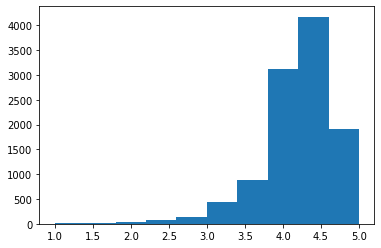

In [ ]:
np.histogram(apps['Rating'])
plt.hist(apps['Rating'])

## 8 Получить DataFrame с MultiIndex любым способом: через конструктор (в документации увидите множество видов конструкторов для создания MultiIndex с нуля), через read_sql / read_csv / read_excel, read_*, через pivot_table, через groupby или иными способами.


In [ ]:
table = apps.pivot_table(index = ["Category", "Genres"], columns = "Rating", values = "Reviews")
table

Rating                                                   1.000000  1.200000  \
Category          Genres                                                      
ART_AND_DESIGN    Art & Design                                NaN       NaN   
                  Art & Design;Action & Adventure             NaN       NaN   
                  Art & Design;Creativity                     NaN       NaN   
                  Art & Design;Pretend Play                   NaN       NaN   
AUTO_AND_VEHICLES Auto & Vehicles                             NaN       NaN   
...                                                           ...       ...   
TRAVEL_AND_LOCAL  Travel & Local;Action & Adventure           NaN       NaN   
VIDEO_PLAYERS     Video Players & Editors                     NaN       NaN   
                  Video Players & Editors;Creativity          NaN       NaN   
                  Video Players & Editors;Music & Video       NaN       NaN   
WEATHER           Weather                                     NaN       NaN   

Rating                                                   1.400000  1.500000  \
Category          Genres                                                      
ART_AND_DESIGN    Art & Design                                NaN       NaN   
                  Art & Design;Action & Adventure             NaN       NaN   
                  Art & Design;Creativity                     NaN       NaN   
                  Art & Design;Pretend Play                   NaN       NaN   
AUTO_AND_VEHICLES Auto & Vehicles                             NaN       NaN   
...                                                           ...       ...   
TRAVEL_AND_LOCAL  Travel & Local;Action & Adventure           NaN       NaN   
VIDEO_PLAYERS     Video Players & Editors                     NaN       NaN   
                  Video Players & Editors;Creativity          NaN       NaN   
                  Video Players & Editors;Music & Video       NaN       NaN   
WEATHER           Weather                                     NaN       NaN   

Rating                                                   1.600000  1.700000  \
Category          Genres                                                      
ART_AND_DESIGN    Art & Design                                NaN       NaN   
                  Art & Design;Action & Adventure             NaN       NaN   
                  Art & Design;Creativity                     NaN       NaN   
                  Art & Design;Pretend Play                   NaN       NaN   
AUTO_AND_VEHICLES Auto & Vehicles                             NaN       NaN   
...                                                           ...       ...   
TRAVEL_AND_LOCAL  Travel & Local;Action & Adventure           NaN       NaN   
VIDEO_PLAYERS     Video Players & Editors                     NaN       NaN   
                  Video Players & Editors;Creativity          NaN       NaN   
                  Video Players & Editors;Music & Video       NaN       NaN   
WEATHER           Weather                                     NaN       NaN   

Rating                                                   1.800000  1.900000  \
Category          Genres                                                      
ART_AND_DESIGN    Art & Design                                NaN       NaN   
                  Art & Design;Action & Adventure             NaN       NaN   
                  Art & Design;Creativity                     NaN       NaN   
                  Art & Design;Pretend Play                   NaN       NaN   
AUTO_AND_VEHICLES Auto & Vehicles                             NaN       NaN   
...                                                           ...       ...   
TRAVEL_AND_LOCAL  Travel & Local;Action & Adventure           NaN       NaN   
VIDEO_PLAYERS     Video Players & Editors                    26.0     105.0   
                  Video Players & Editors;Creativity          NaN       NaN   
                  Video Players & Editors;Music

## 9 Переставить местами уровни индекса


In [ ]:
table.index = table.index.swaplevel(0, 1)
table

,Rating,1.000000,1.200000,1.400000,1.500000,1.600000,1.700000,1.800000,1.900000,2.000000,2.100000,...,4.191757,4.200000,4.300000,4.400000,4.500000,4.600000,4.700000,4.800000,4.900000,5.000000
Genres,Category,,,,,,,,,,,,,,,,,,,,,
Art & Design,ART_AND_DESIGN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.500000,6766.714286,6.506433e+04,78576.875000,5.522050e+04,7.659833e+04,28070.500000,350.000000,NaN,1.0
Art & Design;Action & Adventure,ART_AND_DESIGN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,61.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Art & Design;Creativity,ART_AND_DESIGN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9.670000e+02,NaN,NaN,NaN,9508.666667,NaN,NaN,NaN
Art & Design;Pretend Play,ART_AND_DESIGN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Auto & Vehicles,AUTO_AND_VEHICLES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,...,3.000000,46430.285714,1.195800e+04,37857.000000,1.162600e+03,1.345764e+04,NaN,24954.800000,44310.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Travel & Local;Action & Adventure,TRAVEL_AND_LOCAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Video Players & Editors,VIDEO_PLAYERS,NaN,NaN,NaN,NaN,NaN,NaN,26.0,105.0,NaN,NaN,...,33.066667,200108.846154,2.694080e+06,219622.700000,1.679282e+06,1.762088e+06,126459.333333,574048.333333,23.0,NaN
Video Players & Editors;Creativity,VIDEO_PLAYERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 10 Транспонировать таблицу (или создать новую другую) с MultiIndex

In [ ]:
table.T

Genres,Art & Design,Art & Design;Action & Adventure,Art & Design;Creativity,Art & Design;Pretend Play,Auto & Vehicles,Beauty,Books & Reference,Business,Comics,Comics;Creativity,...,Social,Sports,Tools,Tools;Education,Travel & Local,Travel & Local;Action & Adventure,Video Players & Editors,Video Players & Editors;Creativity,Video Players & Editors;Music & Video,Weather
Category,ART_AND_DESIGN,ART_AND_DESIGN,ART_AND_DESIGN,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMICS,...,SOCIAL,SPORTS,TOOLS,TOOLS,TRAVEL_AND_LOCAL,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,VIDEO_PLAYERS,VIDEO_PLAYERS,WEATHER
Rating,,,,,,,,,,,,,,,,,,,,,
1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,...,NaN,NaN,2.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.000000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.900000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.000000,NaN,NaN,...,NaN,NaN,1.000000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.300000e+01,NaN,NaN,NaN,2.600000e+01,NaN,NaN,NaN
1.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.600000e+01,NaN,1.000000e+01,NaN,NaN,NaN,1.050000e+02,NaN,NaN,NaN


## 11 Удалить один из уровней индекса или добавить новый уровень индекса (можно инициализированный константой)


In [ ]:
table = table.reset_index(level=1, drop=True)
table

Rating,1.000000,1.200000,1.400000,1.500000,1.600000,1.700000,1.800000,1.900000,2.000000,2.100000,...,4.191757,4.200000,4.300000,4.400000,4.500000,4.600000,4.700000,4.800000,4.900000,5.000000
Genres,,,,,,,,,,,,,,,,,,,,,
Art & Design,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.500000,6766.714286,6.506433e+04,78576.875000,5.522050e+04,7.659833e+04,28070.500000,350.000000,NaN,1.0
Art & Design;Action & Adventure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,61.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Art & Design;Creativity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9.670000e+02,NaN,NaN,NaN,9508.666667,NaN,NaN,NaN
Art & Design;Pretend Play,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Auto & Vehicles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,...,3.000000,46430.285714,1.195800e+04,37857.000000,1.162600e+03,1.345764e+04,NaN,24954.800000,44310.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Travel & Local;Action & Adventure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Video Players & Editors,NaN,NaN,NaN,NaN,NaN,NaN,26.0,105.0,NaN,NaN,...,33.066667,200108.846154,2.694080e+06,219622.700000,1.679282e+06,1.762088e+06,126459.333333,574048.333333,23.0,NaN
Video Players & Editors;Creativity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 12 Продемонстировать работу .merge

In [ ]:
df1 = apps[['Rating', 'Genres']]
df2 = apps[['Rating', 'Category']]

In [ ]:
df2.merge(df1)

,Rating,Category,Genres
0,1.0,TOOLS,Tools
1,1.0,TOOLS,Education
2,1.0,TOOLS,Business
3,1.0,TOOLS,Tools
4,1.0,TOOLS,Education
...,...,...,...
8819877,5.0,HEALTH_AND_FITNESS,Education
8819878,5.0,HEALTH_AND_FITNESS,Communication
8819879,5.0,HEALTH_AND_FITNESS,Education
8819880,5.0,HEALTH_AND_FITNESS,Education


## 13 Продемонстрировать работу с .concat или append

In [ ]:
pd.concat([apps[['Size', 'Installs']], apps[['Type', 'Price']]], axis=1)

,Size,Installs,Type,Price
8820,4.4M,500+,Free,0
4127,16M,10+,Paid,$2.99
7806,7.8M,100+,Free,0
10591,41M,500+,Free,0
5978,2.0M,50+,Paid,$1.49
...,...,...,...,...
10335,12M,"1,000+",Free,0
7142,3.7M,50+,Free,0
6823,10M,"1,000+",Free,0
7842,3.3M,"1,000+",Free,0


## 14 Проитерировать dataframe построчно .iterrows(). Выполните что-то имеющее смысл внутри цикла

In [ ]:
apps_data = apps.loc[apps.Rating > 4.5]
for idx, row in apps_data.iterrows():
  if row.Type == 'Free':
    apps_data.at[idx, 'Top free'] = '+'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
apps_data.loc[apps_data['Top free'] == '+']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,App and category,Rating and reviews,Price in dollars,Top free
1802,Partymasters - Fun Idle Game,GAME,4.6,541144,63M,"10,000,000+",Free,0,Teen,Arcade,"July 12, 2018",1.2.5,5.0 and up,0 Photo Editor & Candy Camera & Grid...,2489262.4,0,+
5075,All Football - Latest News & Videos,SPORTS,4.6,152653,17M,"10,000,000+",Free,0,Everyone,Sports,"August 3, 2018",3.0.5,4.1 and up,0 Photo Editor & Candy Camera & Grid...,702203.8,0,+
1808,Homescapes,GAME,4.6,3093358,Varies with device,"10,000,000+",Free,0,Everyone,Casual,"July 13, 2018",1.8.0.900,4.0.3 and up,0 Photo Editor & Candy Camera & Grid...,14229446.8,0,+
7672,Cestovné poriadky CP,MAPS_AND_NAVIGATION,4.6,2681,6.3M,"100,000+",Free,0,Everyone,Maps & Navigation,"September 25, 2017",1.2.0,4.0.3 and up,0 Photo Editor & Candy Camera & Grid...,12332.6,0,+
1807,Disney Heroes: Battle Mode,GAME,4.6,102107,Varies with device,"5,000,000+",Free,0,Everyone 10+,Strategy,"July 31, 2018",1.2.2,Varies with device,0 Photo Editor & Candy Camera & Grid...,469692.2,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10335,Safe Santa Fe,FAMILY,5.0,2,12M,"1,000+",Free,0,Everyone,Education,"July 4, 2016",1.0,4.0 and up,0 Photo Editor & Candy Camera & Grid...,10.0,0,+
7142,Cb browser,COMMUNICATION,5.0,5,3.7M,50+,Free,0,Everyone,Communication,"April 2, 2018",1.0,4.0 and up,0 Photo Editor & Candy Camera & Grid...,25.0,0,+
6823,Barisal University App-BU Face,FAMILY,5.0,100,10M,"1,000+",Free,0,Everyone,Education,"May 6, 2018",3.1.1,4.0.3 and up,0 Photo Editor & Candy Camera & Grid...,500.0,0,+
7842,CS & IT Interview Questions,FAMILY,5.0,43,3.3M,"1,000+",Free,0,Everyone,Education,"March 27, 2018",1.1,4.2 and up,0 Photo Editor & Candy Camera & Grid...,215.0,0,+
